### Student Information
Name:黃曼琳

Student ID:108065507

GitHub ID:elainehml

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

In [1]:
### New Dataset read
### Data and Data preparation

In [1]:
#firstdocument####

lines1=[]
with open("imdb_labelled.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')  #去掉列表中每一個元素的換行符
        lines1.append(line)
        
l=len(lines1)
texts1=[]
for n in range(0,l):
    texts1.append(lines1[n].split('  \t'))

sentences1=[]
scores1=[]
for sentence, score in texts1:
    sentences1.append(sentence)
    scores1.append(int(score))

print('imdb_read_ok')

#seconddocument####

lines2=[]
with open("amazon_cells_labelled.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')  #去掉列表中每一個元素的換行符
        lines2.append(line)

l=len(lines2)
texts2=[]
for n in range(0,l):
    texts2.append(lines2[n].split('\t'))

sentences2=[]
scores2=[]
for sentence, score in texts2:
    sentences2.append(sentence)
    scores2.append(int(score))

print('amazon_read_ok')

#thirddocument####

lines3=[]
with open("yelp_labelled.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')  #去掉列表中每一個元素的換行符
        lines3.append(line)

l=len(lines3)
texts3=[]
for n in range(0,l):
    texts3.append(lines3[n].split('\t'))

sentences3=[]
scores3=[]

for sentence, score in texts3:
    sentences3.append(sentence)
    scores3.append(int(score))

print('yelp_read_ok')


import numpy as np

sentences=np.hstack((sentences1,sentences2,sentences3))

scores=np.hstack((scores1,scores2,scores3))

resources1=np.ones(1000,int)
resources2=2*resources1
resources3=3*resources1


resources=np.hstack((resources1,resources2,resources3))


imdb_read_ok
amazon_read_ok
yelp_read_ok


In [2]:
### Data Transformation

In [3]:
#construct dataframe

import pandas as pd

X = pd.DataFrame(sentences,columns=["sentences"])
X[0:3]

,sentences
0,"A very, very, very slow-moving, aimless movie ..."
1,Not sure who was more lost - the flat characte...
2,Attempting artiness with black & white and cle...


In [4]:
#adding columns

X["scores"]=scores

len(X)
X[0:10]

,sentences,scores
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [5]:
X["resources"]=resources
X.iloc[::500, 0:3][0:6]

,sentences,scores,resources
0,"A very, very, very slow-moving, aimless movie ...",0,1
500,The entire audience applauded at the conclusio...,1,1
1000,So there is no way for me to plug it in here i...,0,2
1500,"The bose noise cancelling is amazing, which is...",1,2
2000,Wow... Loved this place.,1,3
2500,I also had to taste my Mom's multi-grain pumpk...,1,3


In [6]:
#query

X.query("scores==0 and resources==1")[0:20]

,sentences,scores,resources
0,"A very, very, very slow-moving, aimless movie ...",0,1
1,Not sure who was more lost - the flat characte...,0,1
2,Attempting artiness with black & white and cle...,0,1
3,Very little music or anything to speak of.,0,1
5,"The rest of the movie lacks art, charm, meanin...",0,1
6,Wasted two hours.,0,1
8,A bit predictable.,0,1
15,It had some average acting from the main perso...,0,1
25,This short film certainly pulls no punches.,0,1
26,Graphics is far from the best part of the game.,0,1


In [7]:
### Data Preprocessing

In [ ]:
## punctuation and stop word remove
## tokenize
## wordfrequency 

[('good', 125), ('great', 116), ('film', 95), ('movi', 88), ('love', 75), ('like', 72), ('one', 67), ('work', 64), ('phone', 63), ('realli', 54), ('best', 50), ('place', 49), ('food', 46), ('time', 42), ('use', 39), ('recommend', 39), ('well', 37), ('nice', 35), ('also', 34), ('charact', 33)]
[('movi', 86), ('like', 69), ('phone', 68), ('bad', 63), ('time', 58), ('one', 56), ('go', 55), ('film', 53), ('would', 53), ('dont', 51), ('place', 49), ('food', 48), ('work', 45), ('get', 45), ('realli', 44), ('even', 41), ('wast', 40), ('good', 40), ('make', 39), ('ever', 38)]


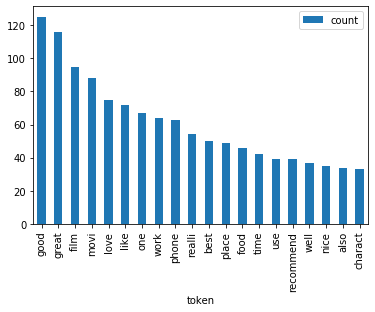

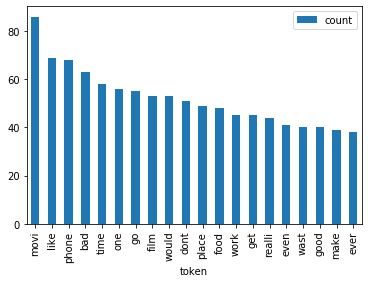

In [9]:
import helpers.data_mining_helpers as dmh
positivetext=[]
ndarr1=X.query("scores==1").to_numpy()

negativetext=[]
ndarr2=X.query("scores==0").to_numpy()


for sentences,scores,resources in ndarr1:
    positivetext.append(sentences)
    
for sentences,scores,resources in ndarr2:
    negativetext.append(sentences)    
    

positiveT="".join(positivetext)
negativeT="".join(negativetext)
dmh.TFs(positiveT)
dmh.TFs(negativeT)

[('good', 125), ('great', 116), ('film', 93), ('movie', 88), ('one', 67), ('phone', 63), ('like', 59), ('really', 54), ('best', 50), ('love', 50), ('work', 48), ('place', 48), ('food', 46), ('time', 41), ('well', 37), ('also', 34), ('nice', 34), ('character', 33), ('recommend', 32), ('excellent', 29)]
[('movie', 86), ('phone', 68), ('like', 67), ('bad', 63), ('time', 58), ('one', 56), ('film', 53), ('would', 53), ('dont', 51), ('food', 48), ('place', 47), ('really', 44), ('even', 40), ('good', 40), ('ever', 38), ('get', 38), ('make', 36), ('go', 36), ('work', 34), ('didnt', 34)]


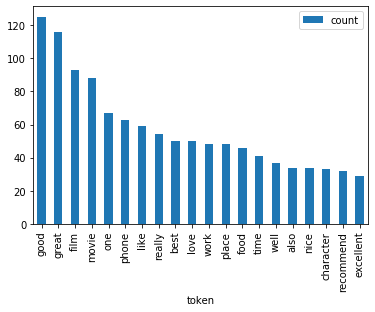

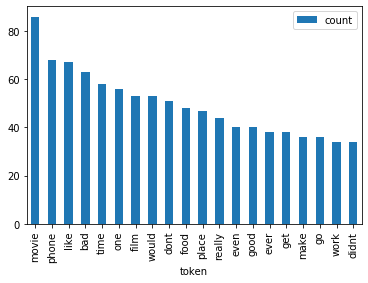

In [10]:
dmh.TFl(positiveT)
dmh.TFl(negativeT)

In [18]:
##POS tagging and tag dataframe######

In [11]:
posedp=dmh.postagging(positiveT)
posedn=dmh.postagging(negativeT)

wordP=[]
wordtagP=[]
for words,tag in posedp:
    wordP.append(words)
    wordtagP.append(tag)
    
wordN=[]
wordtagN=[]
for words,tag in posedn:
    wordN.append(words)
    wordtagN.append(tag)

X_pos=pd.DataFrame(wordP,columns=["words"])
X_pos["tag"]=wordtagP

X_neg=pd.DataFrame(wordN,columns=["words"])
X_neg["tag"]=wordtagN


In [12]:
X_pos[0:20]

,words,tag
0,The,DT
1,best,JJS
2,scene,NN
3,in,IN
4,the,DT
5,movie,NN
6,was,VBD
7,when,WRB
8,Gerardo,NNP
9,is,VBZ


In [13]:
X_neg[0:20]

,words,tag
0,A,DT
1,very,RB
2,very,RB
3,very,RB
4,slow-moving,JJ
5,aimless,JJ
6,movie,NN
7,about,IN
8,a,DT
9,distressed,JJ
